In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math


Bad key "text.kerning_factor" on line 4 in
C:\Users\EhlimanaJugo\anaconda3\envs\Ehlimana\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:

file=pd.read_excel("Merged files.xlsx",header=0)

In [3]:
file.head(3)

,Datum i vrijeme,Plinomjer ist.zgrada 00062313Plin (m3),Brojilo el.energije su 35649294El.energija VT (kWh),Brojilo el.energije su 35649294El.energija MT (kWh),Brojilo el.energije tr 35649314El.energija VT (kWh),Brojilo el.energije tr 35649314El.energija MT (kWh),Vodomjer stara 09249850Voda (m3),Vodomjer nova 09249847Voda (m3),Vodomjer hidrant 10058705Voda (m3),Brojilo el.energije ko 46621646El.energija VT (kWh),...,Temp.senzor vanj.1 25000099Vlažnost (%),Plinomjer zap.zgrada 20526377Plin (m3),Sat,Dan u sedmici,Mjesec,Godina,Kvartal,Dan u godini,Dan u mjesecu,Sedmica
0,2015-10-01 00:00:00,3009985.0,371651.16,230421.12,1225692.6,1130192.8,NaN,NaN,NaN,67287.0,...,80.24,85344.0,0,3,10,2015,4,274,1,40
1,2015-10-01 01:00:00,3009985.0,371651.16,230427.44,1225692.6,1130224.6,NaN,NaN,NaN,67287.0,...,79.87,85344.0,1,3,10,2015,4,274,1,40
2,2015-10-01 02:00:00,3009985.0,371651.16,230433.52,1225692.6,1130256.4,NaN,NaN,NaN,67287.0,...,83.93,85344.0,2,3,10,2015,4,274,1,40


In [4]:
file['Datum i vrijeme'] = pd.to_datetime(file['Datum i vrijeme'],yearfirst=True)

In [5]:
#Merged files has been manually modified 
file["Sat"]=file["Datum i vrijeme"].dt.hour
file["Dan u sedmici"]=file["Datum i vrijeme"].dt.dayofweek
file["Mjesec"]=file["Datum i vrijeme"].dt.month
file["Godina"]=file["Datum i vrijeme"].dt.year
file['Kvartal'] =file['Datum i vrijeme'].dt.quarter
file['Dan u godini'] =file['Datum i vrijeme'].dt.dayofyear
file['Dan u mjesecu'] = file['Datum i vrijeme'].dt.day

In [6]:
file[:46].describe()

,Plinomjer ist.zgrada 00062313Plin (m3),Brojilo el.energije su 35649294El.energija VT (kWh),Brojilo el.energije su 35649294El.energija MT (kWh),Brojilo el.energije tr 35649314El.energija VT (kWh),Brojilo el.energije tr 35649314El.energija MT (kWh),Vodomjer stara 09249850Voda (m3),Vodomjer nova 09249847Voda (m3),Vodomjer hidrant 10058705Voda (m3),Brojilo el.energije ko 46621646El.energija VT (kWh),Brojilo el.energije ko 46621646El.energija MT (kWh),...,Temp.senzor vanj.1 25000099Vlažnost (%),Plinomjer zap.zgrada 20526377Plin (m3),Sat,Dan u sedmici,Mjesec,Godina,Kvartal,Dan u godini,Dan u mjesecu,Sedmica
count,46.0,46.000000,46.000000,4.600000e+01,4.600000e+01,0.0,0.0,0.0,46.0,4.600000e+01,...,46.000000,46.0,46.000000,46.000000,46.0,46.0,46.0,46.000000,46.000000,46.0
mean,3009985.0,371845.360000,230512.073913,1.226167e+06,1.130550e+06,NaN,NaN,NaN,67287.0,7.066290e+04,...,74.908478,85344.0,11.021739,3.478261,10.0,2015.0,4.0,274.478261,1.478261,40.0
std,0.0,136.646635,44.803285,3.521042e+02,1.660126e+02,NaN,NaN,NaN,0.0,4.413814e-11,...,10.269973,0.0,6.744509,0.505047,0.0,0.0,0.0,0.505047,0.505047,0.0
min,3009985.0,371651.160000,230421.120000,1.225693e+06,1.130193e+06,NaN,NaN,NaN,67287.0,7.066290e+04,...,56.430000,85344.0,0.000000,3.000000,10.0,2015.0,4.0,274.000000,1.000000,40.0
25%,3009985.0,371713.380000,230493.350000,1.225808e+06,1.130478e+06,NaN,NaN,NaN,67287.0,7.066290e+04,...,64.970000,85344.0,5.250000,3.000000,10.0,2015.0,4.0,274.000000,1.000000,40.0
50%,3009985.0,371878.180000,230496.700000,1.226259e+06,1.130478e+06,NaN,NaN,NaN,67287.0,7.066290e+04,...,75.790000,85344.0,11.000000,3.000000,10.0,2015.0,4.0,274.000000,1.000000,40.0
75%,3009985.0,371907.360000,230566.230000,1.226337e+06,1.130755e+06,NaN,NaN,NaN,67287.0,7.066290e+04,...,84.800000,85344.0,16.750000,4.000000,10.0,2015.0,4.0,275.000000,2.000000,40.0
max,3009985.0,372078.240000,230569.880000,1.226821e+06,1.130755e+06,NaN,NaN,NaN,67287.0,7.066290e+04,...,87.950000,85344.0,23.000000,4.000000,10.0,2015.0,4.0,275.000000,2.000000,40.0


In [22]:
file

,Datum i vrijeme,Plinomjer ist.zgrada 00062313Plin (m3),Brojilo el.energije su 35649294El.energija VT (kWh),Brojilo el.energije su 35649294El.energija MT (kWh),Brojilo el.energije tr 35649314El.energija VT (kWh),Brojilo el.energije tr 35649314El.energija MT (kWh),Vodomjer stara 09249850Voda (m3),Vodomjer nova 09249847Voda (m3),Kalorimetar 1 39024788Topl.energija (MWh),Kalorimetar 1 39024788Kum.protok (m3),...,Temp.senzor vanj.1 25000099Vlažnost (%),Plinomjer zap.zgrada 20526377Plin (m3),Sat,Dan u sedmici,Mjesec,Godina,Kvartal,Dan u godini,Dan u mjesecu,Sedmica
0,2015-10-01 00:00:00,3009985.0,371651.16,230421.12,1225692.6,1130192.8,NaN,NaN,1349.61,322693.0,...,80.24,85344.0,0,3,10,2015,4,274,1,40
1,2015-10-01 01:00:00,3009985.0,371651.16,230427.44,1225692.6,1130224.6,NaN,NaN,1349.61,322693.0,...,79.87,85344.0,1,3,10,2015,4,274,1,40
2,2015-10-01 02:00:00,3009985.0,371651.16,230433.52,1225692.6,1130256.4,NaN,NaN,1349.61,322693.0,...,83.93,85344.0,2,3,10,2015,4,274,1,40
3,2015-10-01 03:00:00,3009985.0,371651.16,230440.12,1225692.6,1130287.6,NaN,NaN,1349.61,322693.0,...,83.88,85344.0,3,3,10,2015,4,274,1,40
4,2015-10-01 04:00:00,3009985.0,371651.16,230446.64,1225692.6,1130319.0,NaN,NaN,1349.61,322693.0,...,85.09,85344.0,4,3,10,2015,4,274,1,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15122,2018-04-28 19:00:00,1551177.0,488964.48,392127.32,NaN,NaN,15287.43,NaN,2121.33,556111.0,...,66.20,130020.0,19,5,4,2018,2,118,28,17
15123,2018-04-28 20:00:00,1551177.0,488964.48,392133.72,NaN,NaN,15287.43,NaN,2121.33,556111.0,...,64.07,130020.0,20,5,4,2018,2,118,28,17
15124,2018-04-28 21:00:00,1551177.0,488964.48,392140.08,NaN,NaN,15287.43,NaN,2121.33,556111.0,...,62.99,130020.0,21,5,4,2018,2,118,28,17
15125,2018-04-28 22:00:00,1551177.0,488964.48,392146.12,NaN,NaN,15287.43,NaN,2121.33,556111.0,...,65.08,130020.0,22,5,4,2018,2,118,28,17


In [8]:
file.columns

Index(['Datum i vrijeme', 'Plinomjer ist.zgrada 00062313Plin (m3)',
       'Brojilo el.energije su 35649294El.energija VT (kWh)',
       'Brojilo el.energije su 35649294El.energija MT (kWh)',
       'Brojilo el.energije tr 35649314El.energija VT (kWh)',
       'Brojilo el.energije tr 35649314El.energija MT (kWh)',
       'Vodomjer stara 09249850Voda (m3)', 'Vodomjer nova 09249847Voda (m3)',
       'Kalorimetar 1 39024788Topl.energija (MWh)',
       'Kalorimetar 1 39024788Kum.protok (m3)',
       'Kalorimetar 1 39024788Tren.protok (m3/h)',
       'Kalorimetar 1 39024788Temp.pol.voda (°C)',
       'Kalorimetar 1 39024788Temp.pov.voda (°C)',
       'Kalorimetar 2 39024724Kum.protok (m3)',
       'Kalorimetar 2 39024724Tren.protok (m3/h)',
       'Kalorimetar 2 39024724Temp.pol.voda (°C)',
       'Kalorimetar 2 39024724Temp.pov.voda (°C)',
       'Kalorimetar 3 39024787Topl.energija (MWh)',
       'Kalorimetar 3 39024787Kum.protok (m3)',
       'Kalorimetar 3 39024787Tren.protok (m3/h)',
 

In [36]:
filex=file.copy()
filex.set_index(file["Datum i vrijeme"].values)

,Datum i vrijeme,Plinomjer ist.zgrada 00062313Plin (m3),Brojilo el.energije su 35649294El.energija VT (kWh),Brojilo el.energije su 35649294El.energija MT (kWh),Brojilo el.energije tr 35649314El.energija VT (kWh),Brojilo el.energije tr 35649314El.energija MT (kWh),Vodomjer stara 09249850Voda (m3),Vodomjer nova 09249847Voda (m3),Kalorimetar 1 39024788Topl.energija (MWh),Kalorimetar 1 39024788Kum.protok (m3),...,Temp.senzor vanj.1 25000099Vlažnost (%),Plinomjer zap.zgrada 20526377Plin (m3),Sat,Dan u sedmici,Mjesec,Godina,Kvartal,Dan u godini,Dan u mjesecu,Sedmica
2015-10-01 00:00:00,2015-10-01 00:00:00,3009985.0,371651.16,230421.12,1225692.6,1130192.8,NaN,NaN,1349.61,322693.0,...,80.24,85344.0,0,3,10,2015,4,274,1,40
2015-10-01 01:00:00,2015-10-01 01:00:00,3009985.0,371651.16,230427.44,1225692.6,1130224.6,NaN,NaN,1349.61,322693.0,...,79.87,85344.0,1,3,10,2015,4,274,1,40
2015-10-01 02:00:00,2015-10-01 02:00:00,3009985.0,371651.16,230433.52,1225692.6,1130256.4,NaN,NaN,1349.61,322693.0,...,83.93,85344.0,2,3,10,2015,4,274,1,40
2015-10-01 03:00:00,2015-10-01 03:00:00,3009985.0,371651.16,230440.12,1225692.6,1130287.6,NaN,NaN,1349.61,322693.0,...,83.88,85344.0,3,3,10,2015,4,274,1,40
2015-10-01 04:00:00,2015-10-01 04:00:00,3009985.0,371651.16,230446.64,1225692.6,1130319.0,NaN,NaN,1349.61,322693.0,...,85.09,85344.0,4,3,10,2015,4,274,1,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-28 19:00:00,2018-04-28 19:00:00,1551177.0,488964.48,392127.32,NaN,NaN,15287.43,NaN,2121.33,556111.0,...,66.20,130020.0,19,5,4,2018,2,118,28,17
2018-04-28 20:00:00,2018-04-28 20:00:00,1551177.0,488964.48,392133.72,NaN,NaN,15287.43,NaN,2121.33,556111.0,...,64.07,130020.0,20,5,4,2018,2,118,28,17
2018-04-28 21:00:00,2018-04-28 21:00:00,1551177.0,488964.48,392140.08,NaN,NaN,15287.43,NaN,2121.33,556111.0,...,62.99,130020.0,21,5,4,2018,2,118,28,17
2018-04-28 22:00:00,2018-04-28 22:00:00,1551177.0,488964.48,392146.12,NaN,NaN,15287.43,NaN,2121.33,556111.0,...,65.08,130020.0,22,5,4,2018,2,118,28,17


In [39]:
filex = filex.interpolate(method="bfill")

In [ ]:
autocorrelation_plot(filex['Temp.senzor vanj.1 25000099Temperatura (°C)'])
pyplot.show()

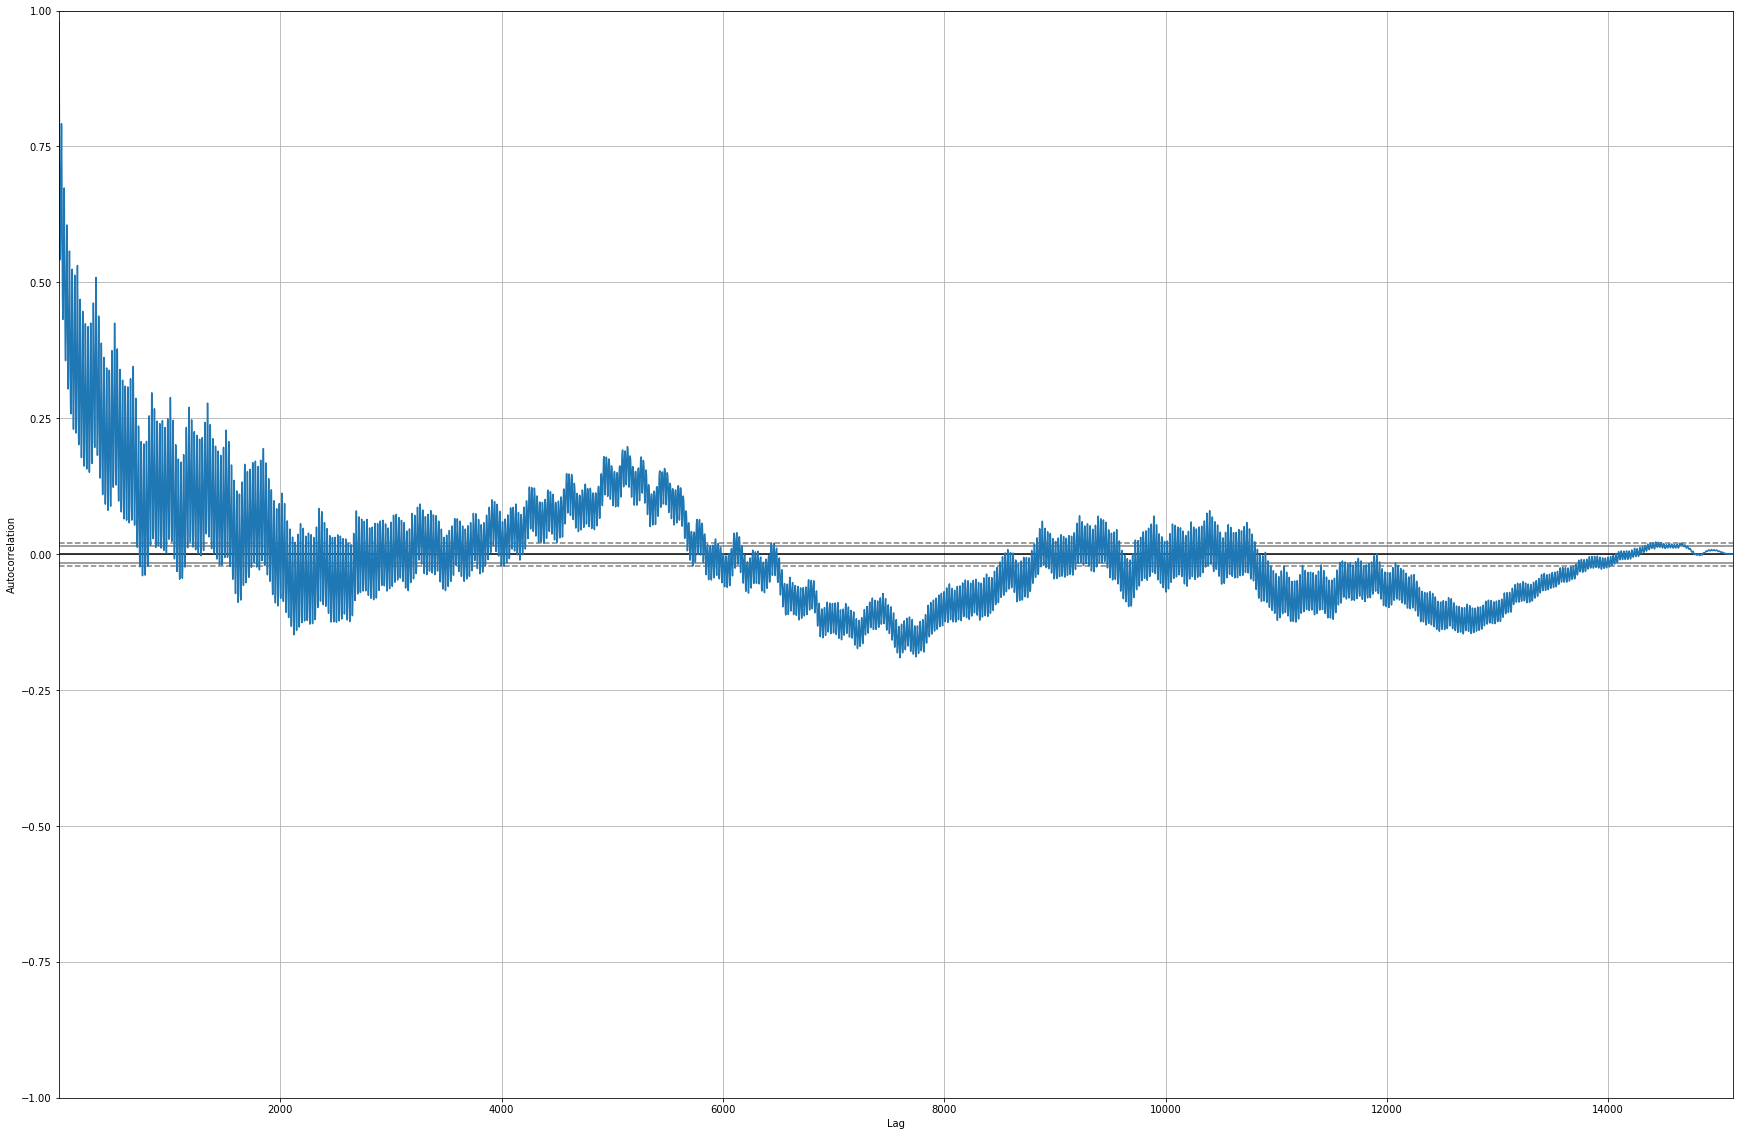

In [49]:
plt.figure(figsize=(30,20))
autocorrelation_plot(filex['Temp.senzor un.4 24004658Temperatura (°C)'])
pyplot.show()

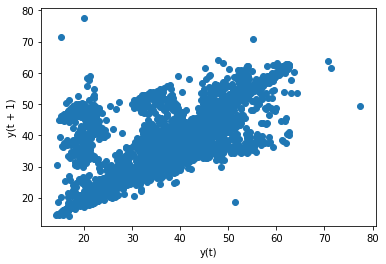

In [18]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
series = file["Kalorimetar 1 39024788Temp.pol.voda (°C)"]

lag_plot(series)
pyplot.show()

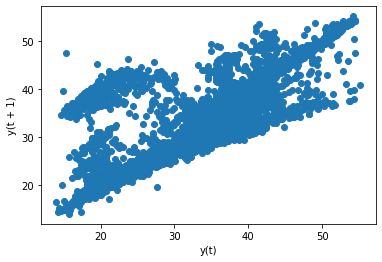

In [21]:
series = file["Kalorimetar 1 39024788Temp.pov.voda (°C)"]

lag_plot(series)
pyplot.show()

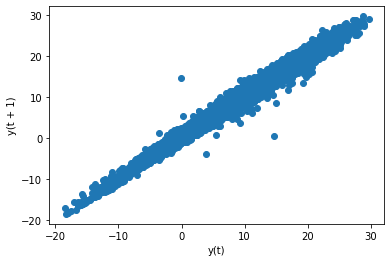

In [19]:
series = file['Temp.senzor vanj.1 25000099Temperatura (°C)']

lag_plot(series)
pyplot.show()

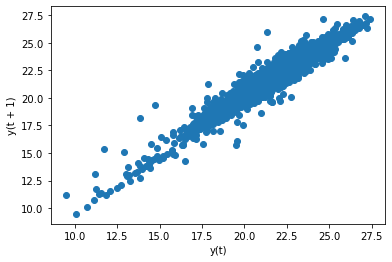

In [20]:
series = file['Temp.senzor un.4 24004658Temperatura (°C)']

lag_plot(series)
pyplot.show()

In [7]:
file=file.drop(['Vodomjer hidrant 10058705Voda (m3)', 'Brojilo el.energije ko 46621646El.energija VT (kWh)', 'Brojilo el.energije ko 46621646El.energija MT (kWh)','Brojilo el.energije po 38878959El.energija VT (kWh)',
       'Brojilo el.energije po 38878959El.energija MT (kWh)',
       'Brojilo el.energije kl 46868995El.energija VT (kWh)',
       'Brojilo el.energije kl 46868995El.energija MT (kWh)', 'Kalorimetar 2 39024724Topl.energija (MWh)'],axis=1)

In [44]:
file.to_excel("Merged files_1.xlsx", index=False)

In [45]:
file=file.sort_values(by=["Godina","Dan u godini","Sat"])

In [46]:
file["Temp sr_K1"]=(file['Kalorimetar 1 39024788Temp.pol.voda (°C)']+file['Kalorimetar 1 39024788Temp.pov.voda (°C)'])/2
file["Temp sr_K3"]=(file['Kalorimetar 3 39024787Temp.pol.voda (°C)']+file['Kalorimetar 3 39024787Temp.pol.voda (°C)'])/2

In [47]:
def heat(val):
    if val>=40:
        return 1
    else: 
        return 0

In [48]:
file["Grijanje_K1"]=list(map(heat,file["Temp sr_K1"].values))
file["Grijanje_K3"]=list(map(heat,file["Temp sr_K3"].values))

In [49]:
aa=file.groupby(["Godina","Dan u godini"], axis=0)

In [50]:
values_tot=[]
for name,group in aa:

    values=[-1]*len(aa.get_group(name))
    if aa.get_group(name)["Grijanje_K1"].empty==False:
        b=np.argwhere(aa.get_group(name)["Grijanje_K1"].values==1)
        enum=list(enumerate(b))
        for k,val in enumerate(b):
            values[val[0]]=enum[k][0]  
    else:pass
    values_tot.append(values)

In [51]:
file["Broj sati grijanja_K1"]=np.concatenate(values_tot)

In [52]:
values_tot=[]
for name,group in aa:

    values=[-1]*len(aa.get_group(name))
    if aa.get_group(name)["Grijanje_K3"].empty==False:
        b=np.argwhere(aa.get_group(name)["Grijanje_K3"].values==1)
        enum=list(enumerate(b))
        for k,val in enumerate(b):
            values[val[0]]=enum[k][0]  
    else:pass
    values_tot.append(values)

In [53]:
file["Broj sati grijanja_K3"]=np.concatenate(values_tot)

In [54]:
aa=file.groupby(["Godina","Dan u godini"], axis=0)

In [55]:
values_xbefore=[]
values_xafter=[]
for name,group in aa:
    values_before=[None]*len(aa.get_group(name))
    values_after=[None]*len(aa.get_group(name))
    if aa.get_group(name)["Grijanje_K1"].empty==False:
        
        b=np.argwhere(aa.get_group(name)["Grijanje_K1"].values)
        if b.size==0:
            values_before=values_before
            values_after=values_after
        else:
            values_before[b[0][0]]=b[0][0]
            values_after[b[-1][0]]=24-b[-1][0]
        
    values_xbefore.append(values_before)
    values_xafter.append(values_after)

In [56]:
val_xbefore=np.concatenate(values_xbefore)
val_xafter=np.concatenate(values_xafter)

In [57]:
file["Negrijano_K1_prije"]=np.concatenate(values_xbefore)
file["Negrijano_K1_poslije"]=np.concatenate(values_xafter)

In [58]:
bb=file.groupby(["Godina","Mjesec","Dan u mjesecu"], axis=0)

In [59]:
start_date_s1=file[file["Datum i vrijeme"]=='10/01/2015  00:00:00 AM'].index.values
end_date_s1=file[file["Datum i vrijeme"]=='05/09/2016  11:00:00 PM'].index.values
start_date_s2=file[file["Datum i vrijeme"]=='09/30/2016  00:00:00 AM'].index.values
end_date_s2=file[file["Datum i vrijeme"]=='04/25/2017  06:00:00 AM'].index.values
start_date_s3=file[file["Datum i vrijeme"]=='10/01/2017  00:00:00 AM'].index.values


In [60]:
S1=file.loc[start_date_s1[0]:end_date_s1[0]]
S2=file.loc[start_date_s2[0]:end_date_s2[0]]
S3=file.loc[start_date_s3[0]:]

In [61]:
values_1=[None]*len(S1["Negrijano_K1_prije"].values)
values_1[0]=-2
num_before=np.argwhere(S1["Negrijano_K1_prije"].values)
num_after=np.argwhere(S1["Negrijano_K1_poslije"].values)
values_1[1:]=[num_before[val][0]-num_after[val-1][0] for val in range(1,len(num_before))]

values_2=[None]*len(S2["Negrijano_K1_prije"].values)
values_2[0]=-2
num_before=np.argwhere(S2["Negrijano_K1_prije"].values)
num_after=np.argwhere(S2["Negrijano_K1_poslije"].values)
values_2[1:]=[num_before[val][0]-num_after[val-1][0] for val in range(1,len(num_before))]

values_3=[None]*len(S3["Negrijano_K1_prije"].values)
values_3[0]=-2#pocetak sezone
num_before=np.argwhere(S3["Negrijano_K1_prije"].values)
num_after=np.argwhere(S3["Negrijano_K1_poslije"].values)
values_3[1:]=[num_before[val][0]-num_after[val-1][0] for val in range(1,len(num_before))]

In [62]:
val_unheat=np.concatenate([values_1,values_2,values_3])

In [63]:
file["Negrijano"]=np.empty(len(file["Negrijano_K1_prije"].values))
for val,k in list(enumerate(np.argwhere(file["Negrijano_K1_prije"].values))):
    file["Negrijano"].values[[k][0]]=val_unheat[val]

In [64]:
file[["Temp sr_K1","Temp sr_K3"]]=file[["Temp sr_K1","Temp sr_K3"]].fillna(0)

In [65]:
t1=S1['Temp.senzor un.4 24004658Temperatura (°C)'].shift(1)
t2=S2['Temp.senzor un.4 24004658Temperatura (°C)'].shift(1)
t3=S3['Temp.senzor un.4 24004658Temperatura (°C)'].shift(1)

t4=S1['Temp.senzor vanj.1 25000099Temperatura (°C)'].shift(1)
t5=S2['Temp.senzor vanj.1 25000099Temperatura (°C)'].shift(1)
t6=S3['Temp.senzor vanj.1 25000099Temperatura (°C)'].shift(1)

t7=S1['Kalorimetar 1 39024788Temp.pol.voda (°C)'].shift(1)
t8=S2['Kalorimetar 1 39024788Temp.pol.voda (°C)'].shift(1)
t9=S3['Kalorimetar 1 39024788Temp.pol.voda (°C)'].shift(1)

t10=S1['Kalorimetar 1 39024788Temp.pov.voda (°C)'].shift(1)
t11=S2['Kalorimetar 1 39024788Temp.pov.voda (°C)'].shift(1)
t12=S3['Kalorimetar 1 39024788Temp.pov.voda (°C)'].shift(1)

t_prior=np.concatenate([t1,t2,t3])
t_prior2=np.concatenate([t4,t5,t6])
t_prior3=np.concatenate([t7,t8,t9])
t_prior4=np.concatenate([t10,t11,t12])
file["T prost (t-1)"]=t_prior
file["T vanj(t-1)"]=t_prior2
file["T pol (t-1)"]=t_prior3
file["T pov (t-1)"]=t_prior4
file=file.dropna(subset=["T prost (t-1)"])



In [66]:
file.to_excel("Merged files_1.xlsx", index=False)#manually modified and saved as Merged files_2)